<a href="https://colab.research.google.com/github/krishnaaxo/MetroInterstateTrafficVolume_TimeSeries/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)
import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [ ]:
df=pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')

In [ ]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [ ]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
df['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [ ]:
holiday_le = preprocessing.LabelEncoder()
df['holiday'] = holiday_le.fit_transform(df['holiday']) 
weather_main_le = preprocessing.LabelEncoder()
df['weather_main'] = weather_main_le.fit_transform(df['weather_main']) 
weather_description_le = preprocessing.LabelEncoder()
df['weather_description'] = weather_description_le.fit_transform(df['weather_description']) 

In [ ]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,7,283.45,0.0,0.0,75,1,2,2018-09-30 19:00:00,3543
48200,7,282.76,0.0,0.0,90,1,19,2018-09-30 20:00:00,2781
48201,7,282.73,0.0,0.0,90,10,21,2018-09-30 21:00:00,2159
48202,7,282.09,0.0,0.0,90,1,19,2018-09-30 22:00:00,1450
48203,7,282.12,0.0,0.0,90,1,19,2018-09-30 23:00:00,954


In [ ]:
df.duplicated().sum()

17

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

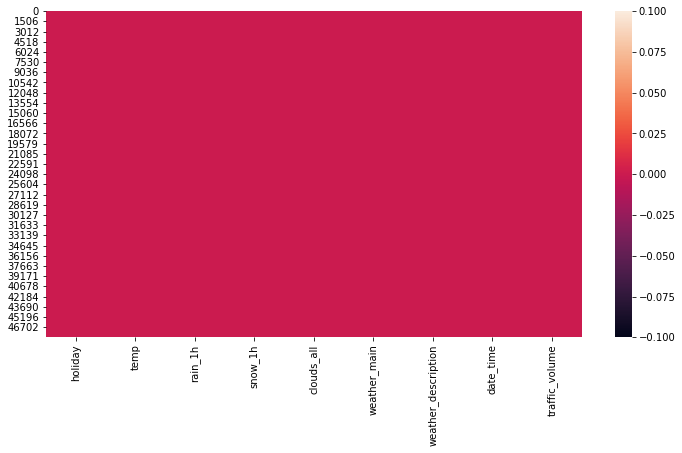

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.shape

(48187, 9)

In [ ]:
df['date_time']=pd.to_datetime(df['date_time'],infer_datetime_format=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48187 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48187 non-null  int64         
 1   temp                 48187 non-null  float64       
 2   rain_1h              48187 non-null  float64       
 3   snow_1h              48187 non-null  float64       
 4   clouds_all           48187 non-null  int64         
 5   weather_main         48187 non-null  int64         
 6   weather_description  48187 non-null  int64         
 7   date_time            48187 non-null  datetime64[ns]
 8   traffic_volume       48187 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 3.7 MB


In [ ]:
df=df.set_index('date_time')

In [ ]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,7,288.28,0.0,0.0,40,1,24,5545
2012-10-02 10:00:00,7,289.36,0.0,0.0,75,1,2,4516
2012-10-02 11:00:00,7,289.58,0.0,0.0,90,1,19,4767
2012-10-02 12:00:00,7,290.13,0.0,0.0,90,1,19,5026
2012-10-02 13:00:00,7,291.14,0.0,0.0,75,1,2,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,7,283.45,0.0,0.0,75,1,2,3543
2018-09-30 20:00:00,7,282.76,0.0,0.0,90,1,19,2781
2018-09-30 21:00:00,7,282.73,0.0,0.0,90,10,21,2159


In [ ]:
df=df.resample('M').mean()


In [ ]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-31,6.992547,281.498907,0.000000,0.0,64.982609,2.176398,15.265839,3486.740373
2012-11-30,7.006369,275.851261,0.000000,0.0,59.712102,1.915924,16.038217,3198.431847
2012-12-31,6.992776,268.889690,0.000000,0.0,70.079463,3.551084,14.687307,2983.665635
2013-01-31,6.998584,264.677776,0.000000,0.0,59.019830,2.528329,14.355524,3153.654391
2013-02-28,7.005579,265.552357,0.000000,0.0,69.036262,2.913529,14.119944,3163.216179
...,...,...,...,...,...,...,...,...
2018-05-31,6.997704,291.873147,0.000000,0.0,39.965557,2.409874,17.835821,3317.254879
2018-06-30,7.000000,294.659794,0.000000,0.0,50.955378,2.974828,16.831808,3444.641876
2018-07-31,6.994226,295.452794,0.000000,0.0,35.113164,2.408776,18.250577,3236.646651


In [ ]:
df=df.fillna(df.mean())

In [ ]:
df.shape

(72, 8)

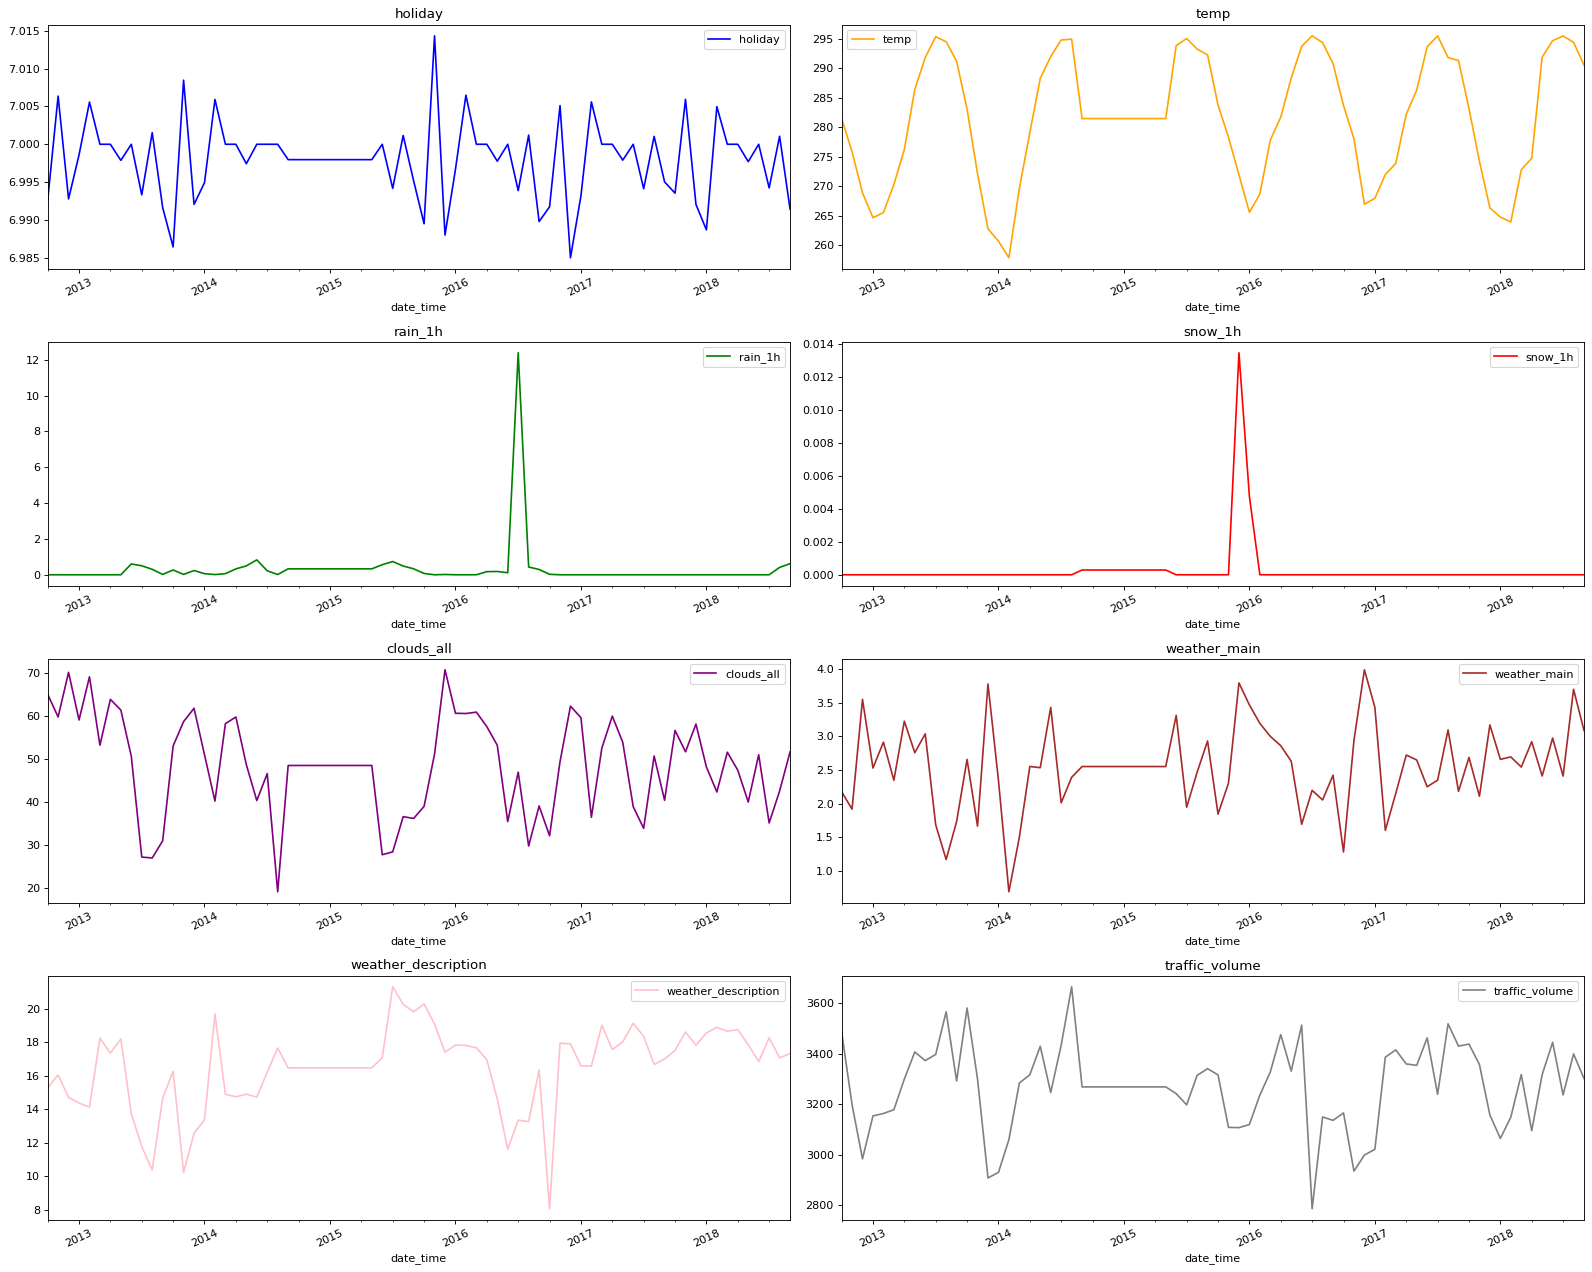

In [ ]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(20,feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

In [ ]:
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

holiday - Series is not Stationary
temp - Series is Stationary
rain_1h - Series is Stationary
snow_1h - Series is Stationary
clouds_all - Series is Stationary
weather_main - Series is Stationary
weather_description - Series is not Stationary
traffic_volume - Series is Stationary


In [ ]:
max_lags=8
y='traffic_volume'

In [ ]:
for i in range(len(df.columns)-1):
  results=grangercausalitytests(df[[y,df.columns[i+1]]], max_lags, verbose=False)
  p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
  print('Column - {} : P_Values - {}'.format(df.columns[i+1],p_values))

Column - temp : P_Values - [0.0986, 0.0026, 0.0156, 0.0378, 0.1323, 0.2259, 0.5243, 0.476]
Column - rain_1h : P_Values - [0.5405, 0.7467, 0.7747, 0.125, 0.1184, 0.0838, 0.2298, 0.2627]
Column - snow_1h : P_Values - [0.6439, 0.8096, 0.8751, 0.8971, 0.9586, 0.9809, 0.0154, 0.0146]
Column - clouds_all : P_Values - [0.5509, 0.9178, 0.5037, 0.3448, 0.1961, 0.2114, 0.1705, 0.3281]
Column - weather_main : P_Values - [0.4605, 0.3501, 0.4579, 0.3691, 0.5146, 0.5276, 0.657, 0.8154]
Column - weather_description : P_Values - [0.0196, 0.0637, 0.1669, 0.1972, 0.1329, 0.1832, 0.2637, 0.0944]
Column - traffic_volume : P_Values - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
df_input=df[['weather_description','weather_main','temp','clouds_all','traffic_volume']]
df_input

,weather_description,weather_main,temp,clouds_all,traffic_volume
date_time,,,,,
2012-10-31,15.265839,2.176398,281.498907,64.982609,3486.740373
2012-11-30,16.038217,1.915924,275.851261,59.712102,3198.431847
2012-12-31,14.687307,3.551084,268.889690,70.079463,2983.665635
2013-01-31,14.355524,2.528329,264.677776,59.019830,3153.654391
2013-02-28,14.119944,2.913529,265.552357,69.036262,3163.216179
...,...,...,...,...,...
2018-05-31,17.835821,2.409874,291.873147,39.965557,3317.254879
2018-06-30,16.831808,2.974828,294.659794,50.955378,3444.641876
2018-07-31,18.250577,2.408776,295.452794,35.113164,3236.646651


In [ ]:
df.describe()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,6.997966,281.468813,0.330654,0.000289,48.454896,2.550576,16.459227,3268.379354
std,0.005332,10.722188,1.456697,0.001673,11.408797,0.634818,2.467571,167.321166
min,6.984995,257.900370,0.000000,0.000000,19.139706,0.685926,8.044077,2786.311275
25%,6.994154,272.624914,0.000000,0.000000,40.134723,2.192146,14.884679,3161.728043
50%,6.997966,281.468813,0.017690,0.000000,48.557782,2.550576,16.748716,3268.379354
75%,7.000000,291.819499,0.330654,0.000000,58.089394,2.932985,17.951276,3375.755941
max,7.014344,295.490181,12.389216,0.013465,70.672384,3.991426,21.298716,3664.544118


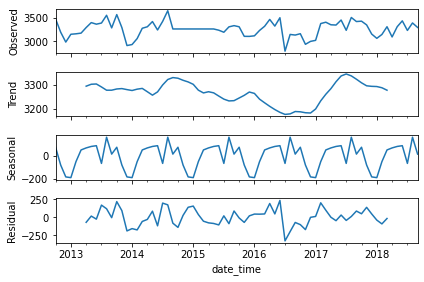

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
result = seasonal_decompose(df['traffic_volume'], model='add') 
result.plot();

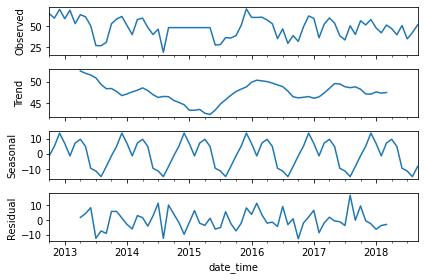

In [ ]:
result = seasonal_decompose(df['clouds_all'], model='add') 
result.plot();

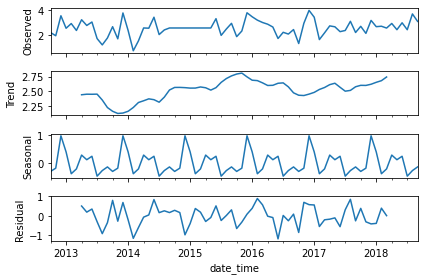

In [ ]:
result = seasonal_decompose(df['weather_main'], model='add') 
result.plot();

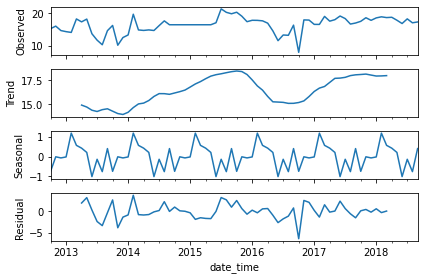

In [ ]:
result = seasonal_decompose(df['weather_description'], model='add') 
result.plot();

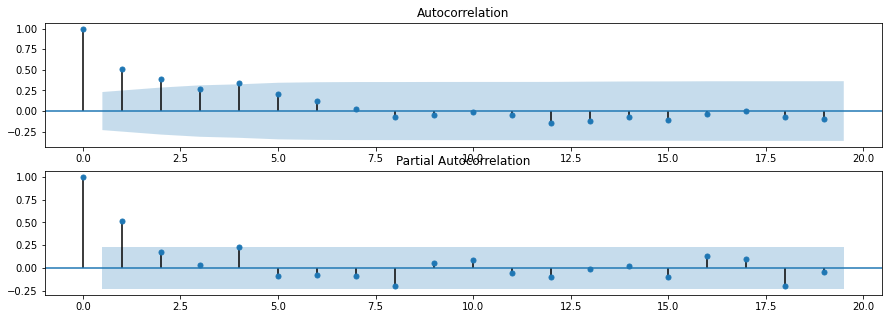

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig= plt.figure(figsize=(15,5))
ax1= fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(df['weather_description'], ax= ax1)
ax2= fig.add_subplot(212)
fig= sm.graphics.tsa.plot_pacf(df['weather_description'], ax= ax2)
plt.show()

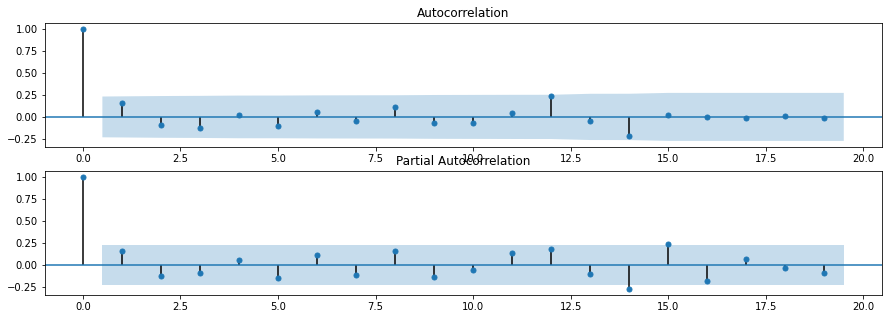

In [ ]:
fig= plt.figure(figsize=(15,5))
ax1= fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(df['weather_main'], ax= ax1)
ax2= fig.add_subplot(212)
fig= sm.graphics.tsa.plot_pacf(df['weather_main'], ax= ax2)
plt.show()

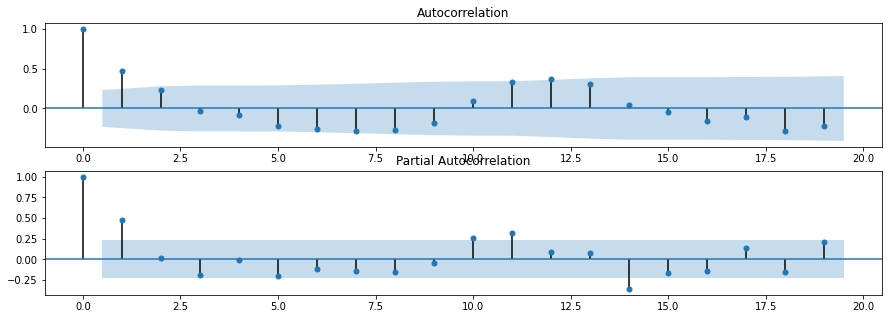

In [ ]:
fig= plt.figure(figsize=(15,5))
ax1= fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(df['clouds_all'], ax= ax1)
ax2= fig.add_subplot(212)
fig= sm.graphics.tsa.plot_pacf(df['clouds_all'], ax= ax2)
plt.show()

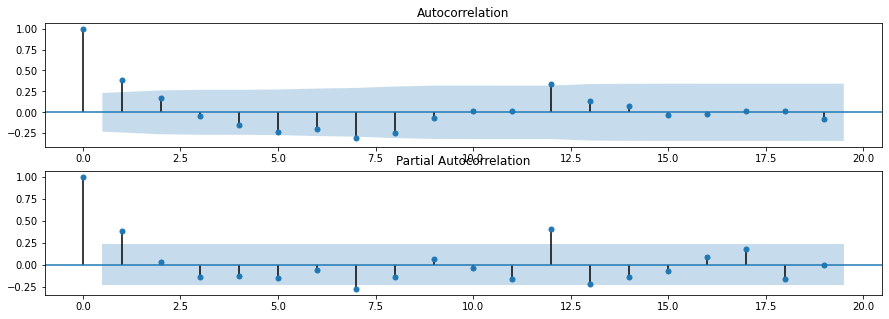

In [ ]:
fig= plt.figure(figsize=(15,5))
ax1= fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(df['traffic_volume'], ax= ax1)
ax2= fig.add_subplot(212)
fig= sm.graphics.tsa.plot_pacf(df['traffic_volume'], ax= ax2)
plt.show()

In [ ]:
df_train = df_input[:int(0.9*(len(df_input)))]
df_test = df_input[int(0.9*(len(df_input))):]

In [ ]:
df_train.shape

(64, 5)

In [ ]:
df_test.shape

(8, 5)